In [6]:
import csv
MAX_VERSES = 199
annotation_list = ["Copy of ENGESV_Romans_segments - English1.tsv", "Copy of ENGESV_Romans_segments - English2.tsv", "Copy of ENGESV_Romans_segments - English3.tsv", "Copy of ENGESV_Romans_segments - chinese1.tsv", "Copy of ENGESV_Romans_segments - chinese2_run.tsv", "Copy of ENGESV_Romans_segments - chinese3_Lin.tsv", "Copy of ENGESV_Romans_segments - Romanian_David.tsv"]

annotation_list.append("Copy of ENGESV_Romans_segments - Korean_Kathleen.tsv")
annotation_list.append("Copy of ENGESV_Romans_segments - Vietnamese_Huyen.tsv")
annotation_list.append("Copy of ENGESV_Romans_segments - Dutch_Huyen.tsv")
annotation_list.append("Copy of ENGESV_Romans_segments - Cantonese_Mandy.tsv")
annotation_list.append("Copy of ENGESV_Romans_segments - German_Daniel.tsv")

In [2]:
# Checks if the tsv file is valid and contents can be printed out
def printrows(tsv_file):
    annotations = open(tsv_file)
    read_tsv = csv.reader(annotations, delimiter="\t")
    row_count = 1
    for row in read_tsv:
        if row_count == MAX_VERSES:
            print("BREAK")
            break
        print(row_count, row)
        print()
        row_count += 1
        
printrows("Copy of ENGESV_Romans_segments - German_Daniel.tsv")

1 ['B06___01_Romans______GERBIBN1DA_1_7400_20120.mp3', 'text', '', 'X', '', '', '', 'X', '', '']

2 ['B06___01_Romans______GERBIBN1DA_2_20120_25200.mp3', 'text', '', 'X', '', '', '', 'X', '', '']

3 ['B06___01_Romans______GERBIBN1DA_3-4_25200_47440.mp3', 'text', 'X', '', '', '', 'X', '', '', '']

4 ['ch1 v4', '', 'X', '', '', '', 'X', '', '', '']

5 ['B06___01_Romans______GERBIBN1DA_5_47440_61200.mp3', 'text', 'X', '', '', '', 'X', '', '', '']

6 ['B06___01_Romans______GERBIBN1DA_6_61200_67720.mp3', 'text', '', 'X', '', '', '', 'X', '', '']

7 ['B06___01_Romans______GERBIBN1DA_7_67720_83480.mp3', 'text', 'X', '', '', '', 'X', '', '', '']

8 ['B06___01_Romans______GERBIBN1DA_8_83480_92360.mp3', 'text', '', 'X', '', '', 'X', '', '', '']

9 ['B06___01_Romans______GERBIBN1DA_9_92360_104160.mp3', 'text', 'X', '', '', '', 'X', '', '', '']

10 ['B06___01_Romans______GERBIBN1DA_10_104160_112440.mp3', 'text', '', 'X', '', '', '', 'X', '', '']

11 ['B06___01_Romans______GERBIBN1DA_11_112440_1219

In [3]:
# Transfer the contents of a tsv file to a list for easier access
def tsv_to_list(annotation_file, max_verses):
    annotation_list = [] # rows are verses, columns are title, text, labels
    annotation = open(annotation_file)
    read_tsv = csv.reader(annotation, delimiter="\t") 
    verse_count = 1
    for row in read_tsv:
        if verse_count == max_verses:
            break
        annotation_list.append(row)
        verse_count += 1
    return annotation_list

In [4]:
# Get the label for each verse for one annotator
# N: -1, N+NU: -0.5, NU: 0, P+NU: 0.5, P: 1
def get_labels_for(annotation):
    labels = []
    row_num = 0
    for row in annotation:
        if row[5] == '?' or row[5] == 'X': # don't use unsure
            labels.append(None)
        elif row[2].upper() == 'X' and (row[3].upper() != 'X' and row[4].upper() == 'X'): # don't use pos + neg mixed labels
            labels.append(None) 
        elif row[2].upper() == 'X' and (row[3].upper() != 'X' and row[4].upper() != 'X'): # only pos
            labels.append(1)
        elif row[2].upper() == 'X' and (row[3].upper() == 'X' and row[4].upper() != 'X'): # pos + neu
            labels.append(0.5)
        elif row[3].upper() == 'X' and (row[2].upper() != 'X' and row[4].upper() != 'X'): # only neu 
            labels.append(0)
        elif row[4].upper() == 'X' and (row[3].upper() != 'X' and row[2].upper() != 'X'): # only neg
            labels.append(-1)
        elif row[4].upper() == 'X' and (row[3].upper() == 'X' and row[2].upper() != 'X'): # neg + neu
            labels.append(-0.5)  
        else:
            print("outlier row:", row_num)
            labels.append(None)
        row_num += 1
    return labels


In [14]:
english1 = tsv_to_list(annotation_list[0], MAX_VERSES)
english2 = tsv_to_list(annotation_list[1], MAX_VERSES)
english3 = tsv_to_list(annotation_list[2], MAX_VERSES)
chinese1 = tsv_to_list(annotation_list[3], MAX_VERSES)
chinese2 = tsv_to_list(annotation_list[4], MAX_VERSES)
chinese3 = tsv_to_list(annotation_list[5], MAX_VERSES)
romanian = tsv_to_list(annotation_list[6], MAX_VERSES)
korean = tsv_to_list(annotation_list[7], MAX_VERSES)
vietnamese = tsv_to_list(annotation_list[8], MAX_VERSES)
dutch = tsv_to_list(annotation_list[9], MAX_VERSES)
cantonese = tsv_to_list(annotation_list[10], MAX_VERSES)
german = tsv_to_list(annotation_list[11], MAX_VERSES)

english1_labels = get_labels_for(english1)
english2_labels = get_labels_for(english2)
english3_labels = get_labels_for(english3)
chinese1_labels = get_labels_for(chinese1)
chinese2_labels = get_labels_for(chinese2)
chinese3_labels = get_labels_for(chinese3)
romanian_labels = get_labels_for(romanian)
korean_labels = get_labels_for(korean)
vietnamese_labels = get_labels_for(vietnamese)
dutch_labels = get_labels_for(dutch)
cantonese_labels = get_labels_for(cantonese)
german_labels = get_labels_for(german)

annotations = []

annotations.append(english1_labels) 
annotations.append(english2_labels)
annotations.append(english3_labels)
annotations.append(chinese1_labels)
annotations.append(chinese2_labels) 
annotations.append(chinese3_labels) 
annotations.append(romanian_labels)
annotations.append(korean_labels)
annotations.append(vietnamese_labels)
annotations.append(dutch_labels)
annotations.append(cantonese_labels)
annotations.append(german_labels)

print(len(annotations[0]))
for annotation in annotations:
    verse_count = 0
    while verse_count < len(annotations[0]):
        if annotation[verse_count] == None:
            for annot in annotations:
                del annot[verse_count]
        else:
            verse_count += 1
                       
for annotation in annotations:
    print(annotation)
    print(len(annotation))


198
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 0, -1, 1, 1, -1, -1, -1, -1, -1, 0, 1, 0, 1, 1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 0, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 0, 1, 1, 1, 1, 1, -1, 0]
124
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 0, 1, -1, -1, 1, 0, 0, 1, 1, 0, 0, 1, 1, -0.5, -0.5, -1, -1, -1, 0, 1, 0, 1, 1, 0, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 1, 1, -1, 1, 1, 1, 0, 1, 1, 0, 0.5, 1, 1, 1, 0, 0.5, 0.5, 0, 0.5, -0.5, 1, 0.5, 1, 1, 0, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 0, 1, 1, 0, 1, -1, 1, 1, -1, 0, 0, 1, 1, 1, 1, 1, 0, 0]
124
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -0.5, 1, -1, -1, 0, 1, -1, -1, 1, 0, -1, 1, 1

In [15]:
# calculate pearson correlations

import scipy
from scipy import stats

pearson_total = 0
num_pearsons = 0

for a in range(len(annotations)):
    for annotation in annotations[a+1:]:
        pearson_total += (stats.pearsonr(annotations[a], annotation))[0]
        num_pearsons += 1
        
avg_pearson = pearson_total / num_pearsons
print(avg_pearson)


english = [annotations[0], annotations[1], annotations[2]]
chinese = [annotations[3], annotations[4], annotations[5]]


# correlations between every english annotation
pearson_total = 0
num_pearsons = 0
for a in range(len(english)):
    for annotation in english[a+1:]:
        pearson_total += (stats.pearsonr(english[a], annotation))[0]
        num_pearsons += 1
        
avg_pearson = pearson_total / num_pearsons
print(avg_pearson)


# correlations between every chinese annotation
pearson_total = 0
num_pearsons = 0
for a in range(len(chinese)):
    for annotation in chinese[a+1:]:
        pearson_total += (stats.pearsonr(chinese[a], annotation))[0]
        num_pearsons += 1
        
avg_pearson = pearson_total / num_pearsons
print(avg_pearson)


# correlations only between different languages
pearson_total = 0
num_pearsons = 0
for a in range(3): #0-2 (English)
    for b in range(3, 6): #3-5 (Chinese)
        pearson_total += (stats.pearsonr(annotations[a], annotations[b]))[0]
        num_pearsons += 1
print(pearson_total / num_pearsons)

0.7461536149138037
0.9108730615039082
0.8139592112406516
0.8499553299754471


In [50]:
# get number of pos, neg, neu, mixed, unsure for one annotator

def get_raw_numbers(tsv_file):
    annotations = open(tsv_file)
    read_tsv = csv.reader(annotations, delimiter="\t")
    
    # text only sentiment counters
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    posneu_count = 0
    negneu_count = 0
    posneg_count = 0
    unsure_count = 0
    
    row_count = 1
    for row in read_tsv:
        if row_count == MAX_VERSES:
            break
        row_count += 1
        if row[5] == '?' or row[5].upper() == 'X': # don't use unsure
            unsure_count += 1
        elif row[2].upper() == 'X' and (row[3].upper() != 'X' and row[4].upper() == 'X'): # pos + neg labels
            posneg_count += 1 
        elif row[2].upper() == 'X' and (row[3].upper() != 'X' and row[4].upper() != 'X'): # only pos
            positive_count += 1 
        elif row[2].upper() == 'X' and (row[3].upper() == 'X' and row[4].upper() != 'X'): # pos + neu
            posneu_count += 1 
        elif row[3].upper() == 'X' and (row[2].upper() != 'X' and row[4].upper() != 'X'): # only neu 
            neutral_count += 1 
        elif row[4].upper() == 'X' and (row[3].upper() != 'X' and row[2].upper() != 'X'): # only neg
            negative_count += 1 
        elif row[4].upper() == 'X' and (row[3].upper() == 'X' and row[2].upper() != 'X'): # neg + neu
            negneu_count += 1 
    annotations.close()
    
    print(tsv_file)
    print("pos:", positive_count)
    print("neg:", negative_count)
    print("neu:", neutral_count)
    print("pos + neu:", posneu_count)
    print("neg + neu:", negneu_count)
    print("pos + neg:", posneg_count)
    print("unsure:", unsure_count, "\n")

In [51]:
for x in range(len(annotation_list)):
    get_raw_numbers(annotation_list[x])

Copy of ENGESV_Romans_segments - English1.tsv
pos: 98
neg: 65
neu: 18
pos + neu: 0
neg + neu: 0
pos + neg: 0
unsure: 17 

Copy of ENGESV_Romans_segments - English2.tsv
pos: 68
neg: 44
neu: 31
pos + neu: 8
neg + neu: 5
pos + neg: 23
unsure: 19 

Copy of ENGESV_Romans_segments - English3.tsv
pos: 86
neg: 44
neu: 32
pos + neu: 6
neg + neu: 6
pos + neg: 12
unsure: 12 

Copy of ENGESV_Romans_segments - chinese1.tsv
pos: 75
neg: 56
neu: 50
pos + neu: 2
neg + neu: 3
pos + neg: 12
unsure: 0 

Copy of ENGESV_Romans_segments - chinese2_run.tsv
pos: 45
neg: 59
neu: 79
pos + neu: 3
neg + neu: 6
pos + neg: 6
unsure: 0 

Copy of ENGESV_Romans_segments - chinese3_Lin.tsv
pos: 73
neg: 54
neu: 47
pos + neu: 5
neg + neu: 5
pos + neg: 14
unsure: 0 

Copy of ENGESV_Romans_segments - Romanian_David.tsv
pos: 74
neg: 60
neu: 64
pos + neu: 0
neg + neu: 0
pos + neg: 0
unsure: 0 

Copy of ENGESV_Romans_segments - Korean_Kathleen.tsv
pos: 52
neg: 49
neu: 34
pos + neu: 12
neg + neu: 22
pos + neg: 29
unsure: 0 

C

In [20]:
# Raw numbers of total count of each sentiment for speech only
def get_raw_numbers_speech(tsv_file):
    annotations = open(tsv_file)
    read_tsv = csv.reader(annotations, delimiter="\t")
   
    # speech only sentiment counters
    sp_positive = 0
    sp_negative = 0
    sp_neutral = 0
    sp_posneu = 0
    sp_negneu = 0
    sp_posneg = 0
    sp_unsure = 0
    sp_mixed = 0
    
    row_count = 0
    for row in read_tsv:
        if row_count == MAX_VERSES:
            break
        speech = row[6].upper()
        if speech == ' ' or '?' in speech:
            sp_unsure += 1
            #print(speech, row_count, "?")
        elif speech == 'P':
            sp_positive += 1
            #print(speech, row_count, "Pos")
        elif speech == 'N' or speech == 'NG':
            sp_negative += 1
            #print(speech, row_count, "Neg")
        elif speech == 'NU' or speech == 'NE':
            sp_neutral += 1
            #print(speech, row_count, "Neu")
        else:
            sp_mixed += 1
            #print(speech, row_count, "Mixed")
            if 'P' in speech and ('NU' in speech or 'NE' in speech):
                sp_posneu += 1
                #print(speech, row_count, "Pos+Neu")
            elif ('N' in speech or 'NG' in speech) and ('NU' in speech or 'NE' in speech):
                sp_negneu += 1
                #print(speech, row_count, "Neg+Neu")
            elif ('N' in speech or 'NG' in speech) and 'P' in speech:
                sp_posneg += 1
                #print(speech, row_count, "Pos+Neg")
        row_count += 1
    annotations.close()
    
    print(tsv_file)
    print("speech pos:", sp_positive)
    print("speech neg:", sp_negative)
    print("speech neu:", sp_neutral)
    print("speech unsure:", sp_unsure)
    print("speech mixed:", sp_mixed)
    print("speech pos + neu:", sp_posneu)
    print("speech neg + neu:", sp_negneu)
    print("speech pos + neg:", sp_posneg)

In [21]:
# Return the text sentiment for a single verse from a tsv file
# Numerical range (-3 is unsure, -2 is pos+neg)
def get_text_sentiment_for_verse(verse_num, tsv_file):
    annotations = open(tsv_file)
    read_tsv = csv.reader(annotations, delimiter="\t")
    row_count = 0
    for row in read_tsv:
        if row_count == verse_num:
            if row[5] == '?' or row[5] == 'X': # unsure
                return -3
            elif row[2].upper() == 'X' and (row[3].upper() != 'X' and row[4].upper() == 'X'): # pos + neg mixed labels
                return -2 
            elif row[2].upper() == 'X' and (row[3].upper() != 'X' and row[4].upper() != 'X'): # only pos
                return 1
            elif row[2].upper() == 'X' and (row[3].upper() == 'X' and row[4].upper() != 'X'): # pos + neu
                return 0.5
            elif row[3].upper() == 'X' and (row[2].upper() != 'X' and row[4].upper() != 'X'): # only neu 
                return 0
            elif row[4].upper() == 'X' and (row[3].upper() != 'X' and row[2].upper() != 'X'): # only neg
                return -1
            elif row[4].upper() == 'X' and (row[3].upper() == 'X' and row[2].upper() != 'X'): # neg + neu
                return -0.5  
            else:
                print("outlier row:", row_count)
                return -3
        row_count += 1
    annotations.close()

In [53]:
# Raw numbers of total count of each sentiment for speech only
# For new method of speech annotation
def get_raw_numbers_speech_new(tsv_file):
    annotations = open(tsv_file)
    read_tsv = csv.reader(annotations, delimiter="\t")
   
    # speech only sentiment counters
    sp_positive = 0
    sp_negative = 0
    sp_neutral = 0
    sp_posneu = 0
    sp_negneu = 0
    sp_posneg = 0
    sp_unsure = 0
    
    row_count = 0
    for row in read_tsv:
        if row_count == MAX_VERSES:
            break
        if len(row) > 9:
            if row[9] == '?' or row[9].upper() == 'X': # unsure
                sp_unsure += 1
                row_count += 1
                continue
            elif row[6] == '' and row[7] == '' and row[8] == '':
                sentiment = get_text_sentiment_for_verse(row_count, tsv_file)
                if sentiment == 1: sp_positive += 1
                if sentiment == 0.5: sp_posneu += 1  
                if sentiment == 0: sp_neutral += 1
                if sentiment == -0.5: sp_negneu += 1
                if sentiment == -1: sp_negative += 1
                if sentiment == -2: sp_posneg += 1
                if sentiment == -3: sp_unsure += 1
        if row[6].upper() == 'X' and (row[7].upper() != 'X' and row[8].upper() == 'X'): # pos + neg labels
            sp_posneg += 1 
        elif row[6].upper() == 'X' and (row[7].upper() != 'X' and row[8].upper() != 'X'): # only pos
            sp_positive += 1 
        elif row[6].upper() == 'X' and (row[7].upper() == 'X' and row[8].upper() != 'X'): # pos + neu
            sp_posneu += 1 
        elif row[7].upper() == 'X' and (row[6].upper() != 'X' and row[8].upper() != 'X'): # only neu 
            sp_neutral += 1 
        elif row[8].upper() == 'X' and (row[7].upper() != 'X' and row[6].upper() != 'X'): # only neg
            sp_negative += 1 
        elif row[8].upper() == 'X' and (row[7].upper() == 'X' and row[6].upper() != 'X'): # neg + neu
            sp_negneu += 1
        elif row[6] == '' and row[7] == '' and row[8] == '':
            sentiment = get_text_sentiment_for_verse(row_count, tsv_file)
            if sentiment == 1: sp_positive += 1
            if sentiment == 0.5: sp_posneu += 1  
            if sentiment == 0: sp_neutral += 1
            if sentiment == -0.5: sp_negneu += 1
            if sentiment == -1: sp_negative += 1
            if sentiment == -2: sp_posneg += 1
            if sentiment == -3: sp_unsure += 1
        else:
            print("outlier row:", row_count)
        row_count += 1
    annotations.close()
    
    print(tsv_file)
    print("speech pos:", sp_positive)
    print("speech neg:", sp_negative)
    print("speech neu:", sp_neutral)
    print("speech unsure:", sp_unsure)
    print("speech pos + neu:", sp_posneu)
    print("speech neg + neu:", sp_negneu)
    print("speech pos + neg:", sp_posneg)

In [55]:
#for annotation in annotation_list:
#get_raw_numbers_speech(annotation_list[7])
#get_raw_numbers_speech_new(annotation_list[8])
get_raw_numbers_speech_new(annotation_list[10])

Copy of ENGESV_Romans_segments - Cantonese_Mandy.tsv
speech pos: 74
speech neg: 49
speech neu: 46
speech unsure: 9
speech pos + neu: 11
speech neg + neu: 2
speech pos + neg: 7


In [23]:
# Get the label for each verse for one annotator
# N: -1, N+NU: -0.5, NU: 0, P+NU: 0.5, P: 1
def get_speech_labels_for(annotation_file):
    labels = []
    annotation_list = []
    annotation = open(annotation_file)
    read_tsv = csv.reader(annotation, delimiter="\t") 
    verse_count = 1
    for row in read_tsv:
        if verse_count == MAX_VERSES:
            break
        annotation_list.append(row)
        verse_count += 1
    
    for row in annotation_list:
        if '?' in row[6]: # don't use unsure
            labels.append(None)
        elif row[6].upper() == 'P': # only pos
            labels.append(1)
        elif row[6].upper() == 'NU' or row[6].upper() == 'NE': # only neu 
            labels.append(0)
        elif row[6].upper() == 'N' or row[6].upper() == 'NG': # only neg
            labels.append(-1)
        else:
            if 'P' in row[6].upper() and ('NU' in row[6].upper() or 'NE' in row[6].upper()): # pos + neu
                labels.append(0.5)
            elif ('N' in row[6].upper() or 'NG' in row[6].upper()) and ('NU' in row[6].upper() or 'NE' in row[6].upper()): # neg + neu
                labels.append(-0.5)
            else: # pos + neg mixed
                labels.append(None)
    annotation.close()
    print(len(labels))
    return labels

In [47]:
# Get the label for each verse for one annotator
# N: -1, N+NU: -0.5, NU: 0, P+NU: 0.5, P: 1
# New for new method of speech label annotation
def get_new_speech_labels_for(annotation_file):
    labels = []
    annotation_list = []
    annotation = open(annotation_file)
    read_tsv = csv.reader(annotation, delimiter="\t") 
    row_count = 0
    for row in read_tsv:
        if row_count == MAX_VERSES:
            break
        if len(row) > 9:
            if row[9] == '?' or row[9].upper() == 'X': # don't use unsure
                labels.append(None)
                #print(">9, unsure", row_count)
                row_count += 1
                continue
            elif row[6] == '' and row[7] == '' and row[8] == '':
                sentiment = get_text_sentiment_for_verse(row_count, annotation_file)
                #print(">9, sentiment", sentiment, row_count)
                if sentiment == -2 or sentiment == -3: labels.append(None)
                else: labels.append(sentiment)
        if row[6].upper() == 'X' and (row[7].upper() != 'X' and row[8].upper() == 'X'): # pos + neg labels
            labels.append(None) 
            #print("unsure", row_count)
        elif row[6].upper() == 'X' and (row[7].upper() != 'X' and row[8].upper() != 'X'): # only pos
            labels.append(1) 
            #print("pos", row_count)
        elif row[6].upper() == 'X' and (row[7].upper() == 'X' and row[8].upper() != 'X'): # pos + neu
            labels.append(0.5)
            #print("0.5", row_count)
        elif row[7].upper() == 'X' and (row[6].upper() != 'X' and row[8].upper() != 'X'): # only neu 
            labels.append(0) 
            #print("neu", row_count)
        elif row[8].upper() == 'X' and (row[7].upper() != 'X' and row[6].upper() != 'X'): # only neg
            labels.append(-1) 
            #print("neg", row_count)
        elif row[8].upper() == 'X' and (row[7].upper() == 'X' and row[6].upper() != 'X'): # neg + neu
            labels.append(-0.5)
            #print("-0.5", row_count)
        elif row[6] == '' and row[7] == '' and row[8] == '' and len(row) <= 9:
            sentiment = get_text_sentiment_for_verse(row_count, annotation_file)
            #print("sentiment", sentiment, row_count)
            if sentiment == -2 or sentiment == -3: labels.append(None)
            else: labels.append(sentiment)
        else:
            if len(row) <= 9:
                print("outlier row:", row_count)
                #print("outlier", row_count)
                labels.append(None)
        row_count += 1
    annotation.close()
    
    print(len(labels))
    return labels

In [45]:
english1_labels = get_speech_labels_for(annotation_list[0])
english2_labels = get_speech_labels_for(annotation_list[1])
english3_labels = get_speech_labels_for(annotation_list[2])
chinese1_labels = get_speech_labels_for(annotation_list[3])
chinese2_labels = get_speech_labels_for(annotation_list[4])
chinese3_labels = get_speech_labels_for(annotation_list[5])
romanian_labels = get_speech_labels_for(annotation_list[6])
korean_labels = get_speech_labels_for(annotation_list[7])
vietnamese_labels = get_new_speech_labels_for(annotation_list[8])
dutch_labels = get_new_speech_labels_for(annotation_list[9])
cantonese_labels = get_new_speech_labels_for(annotation_list[10])
german_labels = get_new_speech_labels_for(annotation_list[11])

speech_annotations = []
speech_annotations.append(english1_labels) 
speech_annotations.append(english2_labels) 
speech_annotations.append(english3_labels) 
speech_annotations.append(chinese1_labels)
speech_annotations.append(chinese2_labels)
speech_annotations.append(chinese3_labels) 
speech_annotations.append(romanian_labels) 
speech_annotations.append(korean_labels) 
speech_annotations.append(vietnamese_labels) 
speech_annotations.append(dutch_labels) 
speech_annotations.append(cantonese_labels) 
speech_annotations.append(german_labels)


for annotation in speech_annotations:
    verse_count = 0
    while verse_count < len(speech_annotations[0]):
        if annotation[verse_count] == None:
            for annot in speech_annotations:
                del annot[verse_count]
        else:
            verse_count += 1
                       
for annotation in speech_annotations:
    print(annotation)
    print(len(annotation))

198
198
198
198
198
198
198
198
neu 0
neu 1
neu 2
pos 3
pos 4
neu 5
neu 6
pos 7
pos 8
neu 9
sentiment 1 10
sentiment 0 11
sentiment 0 12
sentiment 0 13
sentiment 1 14
sentiment 1 15
sentiment 1 16
sentiment -1 17
sentiment 0 18
sentiment 0 19
sentiment -1 20
sentiment -1 21
sentiment -1 22
sentiment -1 23
sentiment -1 24
sentiment -1 25
sentiment -1 26
sentiment -1 27
sentiment -1 28
sentiment -1 29
sentiment -1 30
sentiment -1 31
sentiment -1 32
sentiment 0 33
sentiment 0 34
sentiment 0 35
sentiment -1 36
sentiment 0 37
sentiment 1 38
sentiment -1 39
sentiment -1 40
sentiment 0 41
sentiment 0 42
sentiment -1 43
sentiment -1 44
sentiment -1 45
sentiment -1 46
sentiment -1 47
sentiment -1 48
sentiment -1 49
sentiment 0 50
sentiment -3 51
sentiment -1 52
sentiment -1 53
sentiment -1 54
sentiment -1 55
sentiment -1 56
sentiment -1 57
sentiment -1 58
sentiment -1 59
sentiment -1 60
sentiment -1 61
sentiment 0 62
sentiment -1 63
sentiment -1 64
sentiment -1 65
sentiment -1 66
sentiment -1 6

In [46]:
# Pearson for speech labels
import scipy
from scipy import stats

# correlations between every annotation
pearson_total = 0
num_pearsons = 0
for a in range(len(speech_annotations)):
    for annotation in speech_annotations[a+1:]:
        pearson_total += (stats.pearsonr(speech_annotations[a], annotation))[0]
        num_pearsons += 1
        
avg_pearson = pearson_total / num_pearsons
print(avg_pearson)


english = [speech_annotations[0], speech_annotations[1], speech_annotations[2]]
chinese = [speech_annotations[3], speech_annotations[4], speech_annotations[5]]


# correlations between every english annotation
pearson_total = 0
num_pearsons = 0
for a in range(len(english)):
    for annotation in english[a+1:]:
        pearson_total += (stats.pearsonr(english[a], annotation))[0]
        num_pearsons += 1
        
avg_pearson = pearson_total / num_pearsons
print(avg_pearson)


# correlations between every chinese annotation
pearson_total = 0
num_pearsons = 0
for a in range(len(chinese)):
    for annotation in chinese[a+1:]:
        pearson_total += (stats.pearsonr(chinese[a], annotation))[0]
        num_pearsons += 1
        
avg_pearson = pearson_total / num_pearsons
print(avg_pearson)

# correlations only between different languages
pearson_total = 0
num_pearsons = 0
for a in range(3): #0-2 (English)
    for b in range(3, 6): #3-5 (Chinese)
        pearson_total += (stats.pearsonr(speech_annotations[a], speech_annotations[b]))[0]
        num_pearsons += 1
        
print(pearson_total / num_pearsons)

0.676379224554502
0.9042979079666922
0.7520154953154005
0.7768896885410901


In [35]:
# Compute avg labels separately for each language, then do correlation
label_total = 0
avg_english_labels = []
avg_chinese_labels = []

english = [speech_annotations[0], speech_annotations[1], speech_annotations[2]]
chinese = [speech_annotations[3], speech_annotations[4], speech_annotations[5]]
for l in range(len(speech_annotations[0])):
    for i in range(len(english)):
        label_total += english[i][l]
    avg_english_labels.append(label_total / len(english))
    label_total = 0
print(avg_english_labels, len(avg_english_labels), '\n')

label_total = 0
for l in range(len(speech_annotations[3])):
    for i in range(len(chinese)):
        label_total += chinese[i][l]
    avg_chinese_labels.append(label_total / len(chinese))
    label_total = 0
print(avg_chinese_labels, len(avg_chinese_labels))

import scipy
from scipy import stats
print(stats.pearsonr(avg_english_labels, avg_chinese_labels)[0])

[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.8333333333333334, 0.3333333333333333, -1.0, -1.0, 0.0, 0.6666666666666666, -0.6666666666666666, 1.0, 0.3333333333333333, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, -0.6666666666666666, -1.0, -1.0, -1.0, 0.6666666666666666, -1.0, -0.16666666666666666, 1.0, 0.0, 1.0, -0.6666666666666666, 1.0, -0.3333333333333333, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 1.0, -0.3333333333333333, 1.0, 0.6666666666666666, 0.0, 1.0, 0.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.5, 0.6666666666666666, 1.0, 0.6666666666666666, -1.0, -1.0, 1.0, -0.3333333333333333, 1.0, 1.0, 1.0, 1.0, -0.3333333333333333, -1.0, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, -1.0,

In [48]:
# correlation between text and speech labels
def sp_txt_correlation(annotator):
    import scipy
    from scipy import stats
    
    text = tsv_to_list(annotation_list[annotator], MAX_VERSES)
    text_labels = get_labels_for(text)
    annotations = []
    annotations.append(text_labels) 

    if annotator > 7:
        speech_labels = get_new_speech_labels_for(annotation_list[annotator])
    else:
        speech_labels = get_speech_labels_for(annotation_list[annotator])
    annotations.append(speech_labels)

    for annotation in annotations:
        verse_count = 0
        while verse_count < len(annotations[0]):
            if annotation[verse_count] == None:
                for annot in annotations:
                    del annot[verse_count]
            else:
                verse_count += 1

    for annotation in annotations:
        #print(annotation)
        print(len(annotation))
    
    print("Annotator", annotator, ":", stats.pearsonr(annotations[0], annotations[1])[0])

In [49]:
'''
sp_txt_correlation(0)
sp_txt_correlation(1)
sp_txt_correlation(2)
sp_txt_correlation(3)
sp_txt_correlation(4)
sp_txt_correlation(5)
sp_txt_correlation(6)
sp_txt_correlation(7)
sp_txt_correlation(8)
sp_txt_correlation(9)
'''
sp_txt_correlation(11)

198
186
186
Annotator 11 : 0.9294009484649974


You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


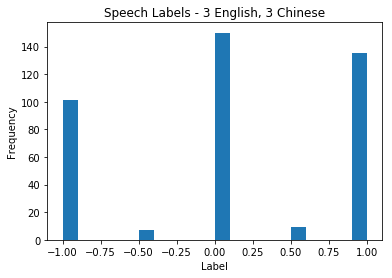

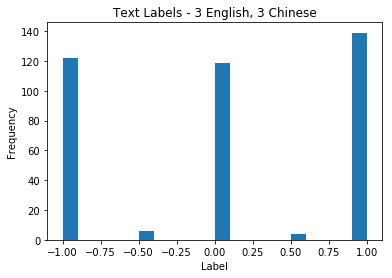

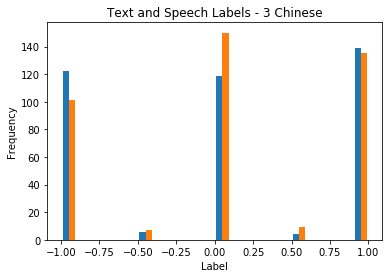

In [21]:
# graphs to visualize distribution of sentiment

!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

speech_labels = []
for annotation in speech_annotations[3:]:
    for label in annotation:
        speech_labels.append(label)

text_labels = []
for annotation in annotations[3:]:
    for label in annotation:
        text_labels.append(label)

all_labels = [text_labels, speech_labels]
plt.hist(speech_labels, bins=20)
plt.title("Speech Labels - 3 English, 3 Chinese")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

plt.hist(text_labels, bins=20)
plt.title("Text Labels - 3 English, 3 Chinese")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

plt.hist(all_labels, bins=20)
plt.title("Text and Speech Labels - 3 Chinese")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


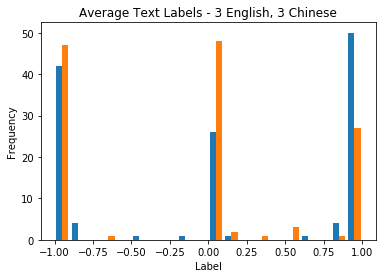

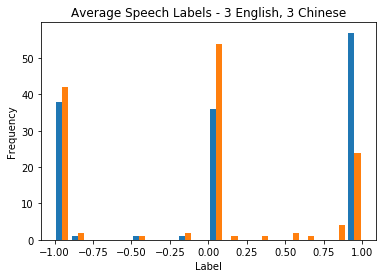

In [18]:
# Compute avg labels separately for each language, then get plot
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

label_total = 0
avg_english_labels = []
avg_chinese_labels = []

english = [annotations[0], annotations[1], annotations[2]]
chinese = [annotations[3], annotations[4], annotations[5]]
for l in range(len(annotations[0])):
    for i in range(len(english)):
        label_total += english[i][l]
    avg_english_labels.append(label_total / len(english))
    label_total = 0

label_total = 0
for l in range(len(annotations[3])):
    for i in range(len(chinese)):
        label_total += chinese[i][l]
    avg_chinese_labels.append(label_total / len(chinese))
    label_total = 0

label_total = 0
avg_sp_english_labels = []
avg_sp_chinese_labels = []

english = [speech_annotations[0], speech_annotations[1], speech_annotations[2]]
chinese = [speech_annotations[3], speech_annotations[4], speech_annotations[5]]
for l in range(len(speech_annotations[0])):
    for i in range(len(english)):
        label_total += english[i][l]
    avg_sp_english_labels.append(label_total / len(english))
    label_total = 0

label_total = 0
for l in range(len(speech_annotations[3])):
    for i in range(len(chinese)):
        label_total += chinese[i][l]
    avg_sp_chinese_labels.append(label_total / len(chinese))
    label_total = 0

avg_text_labels = [avg_english_labels, avg_chinese_labels]
avg_speech_labels = [avg_sp_english_labels, avg_sp_chinese_labels]

plt.hist(avg_text_labels, bins=20)
plt.title("Average Text Labels - 3 English, 3 Chinese")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

plt.hist(avg_speech_labels, bins=20)
plt.title("Average Speech Labels - 3 English, 3 Chinese")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()